In [1]:
import sqlite3
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import sys

__file__ = %pwd
DATA = Path(__file__).parent.parent / "data"
PRIORITIES = DATA / "Priorities"
DATABASE = DATA / "databases" / "exploration.db"
sys.path.append(str(DATA.parent))  # Add the parent directory of 'modeling' to the Python path

plt.style.use("default")
con = sqlite3.connect(DATABASE)
cur = con.cursor()

In [2]:
acgr = pd.read_sql_query("SELECT * FROM ACGRWide", con)
ela = pd.read_sql_query("SELECT * FROM ELAWide", con)
math = pd.read_sql_query("SELECT * FROM MathWide", con)
ltel = pd.read_sql_query("SELECT * FROM LTELWide", con)
public_schools = pd.read_sql_query("SELECT * FROM PublicSchools", con)

In [3]:
def add_suffix_except(
    df, suffix, exclude=("Year", "cdsCode", "CDSCode", "AcademicYear")
):
    return df.rename(
        columns={col: f"{col}{suffix}" for col in df.columns if col not in exclude}
    )


ela_scores_suffixed = add_suffix_except(ela, "_ELA")
math_scores_suffixed = add_suffix_except(math, "_MATH")

merged = pd.merge(
    ltel,
    public_schools,
    left_on="cdsCode",
    right_on="CDSCode",
    how="inner",
    suffixes=("", "_ps"),
)

merged = pd.merge(
    merged,
    acgr,
    left_on=["cdsCode", "AcademicYear"],
    right_on=["cdsCode", "Year"],
    how="inner",
    suffixes=("", "_acgr"),
)

merged = pd.merge(
    merged,
    ela_scores_suffixed,
    left_on=["cdsCode", "AcademicYear"],
    right_on=["cdsCode", "Year"],
    how="inner",
)

merged = pd.merge(
    merged,
    math_scores_suffixed,
    left_on=["cdsCode", "AcademicYear"],
    right_on=["cdsCode", "Year"],
    how="inner",
)

"""
SELECT * FROM LTELWide 
INNER JOIN PublicSchools ON LTELWide.cdsCode = PublicSchools.CDSCode 
INNER JOIN ACGRWide ON ACGRWide.cdsCode = LTELWide.cdsCode AND ACGRWide.Year = LTELWide.AcademicYear 
INNER JOIN ELAWide ON ELAWide.cdsCode = LTELWide.cdsCode AND ELAWide.Year = LTELWide.AcademicYear
INNER JOIN MathWide ON LTELWide.cdsCode = MathWide.cdsCode AND LTELWide.AcademicYear = MathWide.Year;
"""
merged

,AcademicYear,cdsCode,CountyCode,DistrictCode,SchoolCode,EO.11,IFEP.11,EL.11,RFEP.11,TBD.11,...,currdenom.SWD_MATH,currstatus.SWD_MATH,currdenom.WH_MATH,currstatus.WH_MATH,currdenom.PI_MATH,currstatus.PI_MATH,currdenom.AI_MATH,currstatus.AI_MATH,currdenom.HOM_MATH,currstatus.HOM_MATH
0,2023-24,1316170131763,1.0,31617.0,131763.0,37.0,0.0,1.0,0.0,0.0,...,124.0,-87.6,19.0,-72.4,1.0,NaN,NaN,NaN,NaN,NaN
1,2023-24,1316090131755,1.0,31609.0,131755.0,5.0,0.0,0.0,2.0,0.0,...,19.0,-168.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-24,1611190106401,1.0,61119.0,106401.0,19.0,3.0,1.0,25.0,0.0,...,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-24,1611190130229,1.0,61119.0,130229.0,311.0,14.0,30.0,126.0,0.0,...,61.0,-163.8,125.0,15.9,1.0,NaN,NaN,NaN,4.0,NaN
4,2023-24,1611190132142,1.0,61119.0,132142.0,164.0,13.0,22.0,47.0,0.0,...,51.0,-208.0,142.0,-19.5,8.0,NaN,1.0,NaN,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7494,2016-17,56739405633250,56.0,73940.0,5633250.0,346.0,20.0,29.0,88.0,0.0,...,56.0,-157.2,212.0,-13.8,1.0,NaN,3.0,NaN,0.0,NaN
7495,2016-17,57726785730098,57.0,72678.0,5730098.0,23.0,0.0,0.0,0.0,0.0,...,4.0,NaN,20.0,40.3,NaN,NaN,2.0,NaN,NaN,NaN
7496,2016-17,57726785732201,57.0,72678.0,5732201.0,426.0,60.0,37.0,67.0,3.0,...,40.0,-106.0,264.0,53.2,1.0,NaN,NaN,NaN,NaN,NaN
7497,2016-17,56739405630371,56.0,73940.0,5630371.0,29.0,1.0,0.0,2.0,0.0,...,0.0,NaN,17.0,25.2,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
columns_to_drop = [
    col
    for col in merged.columns
    if col.startswith("RegHSDiploma")
    or col.startswith("Dropout")
    or col.startswith("UniReqs")
    or col.startswith("Other")
    or col.startswith("GR_")
    or col.startswith("GED")
    or col.startswith("SPED")
    or col.startswith("Total")
    or col.startswith("TOTAL")
    or col.startswith("SchoolCode")
    or col.startswith("cdsCode")
    or col.startswith("curr")
    or col.startswith("DistrictCode")
    or col.startswith("CountyCode")
    or col.startswith("CDS")
    or col.startswith("cds")
]

## XGBoost


### Graduation Rate


In [5]:
from modeling.utils.xgboost import cross_validate_xgboost

target_variable = "RegHSDiplomaRate.TA"

xgb_graduation_result = cross_validate_xgboost(
    df=merged,
    target_column=target_variable,
    columns_to_drop=[target_variable] + columns_to_drop,
    print_results=True,
    n_jobs=-1,
)

Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2023-24:
RMSE: 6.5057 ± 0.4021
MAE: 3.8002 ± 0.1153
R^2: 0.6259 ± 0.0395


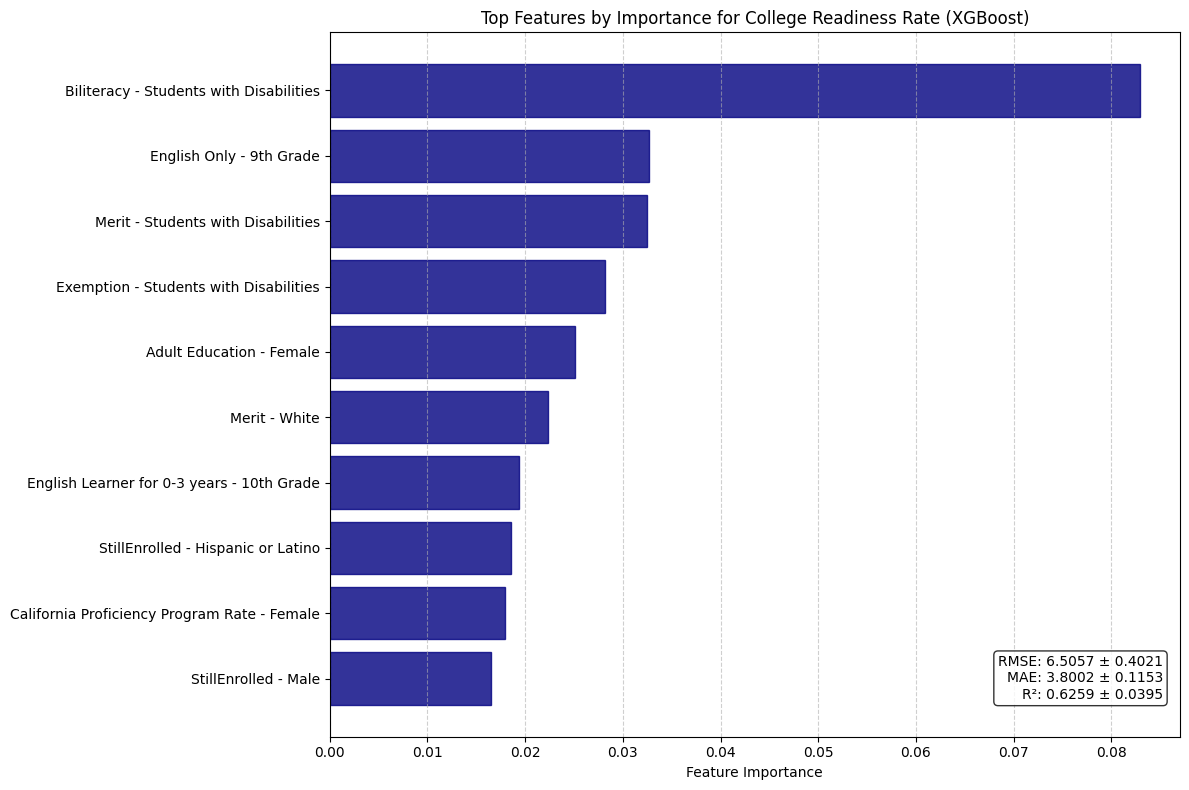

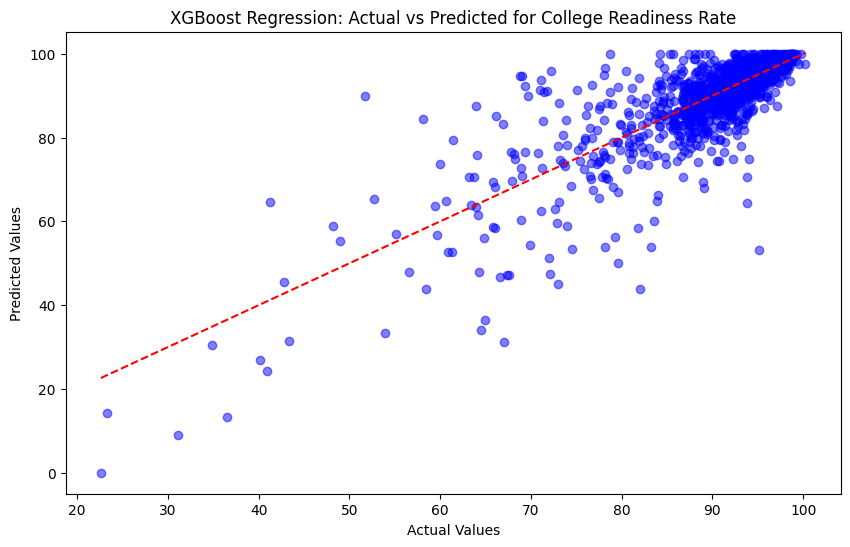

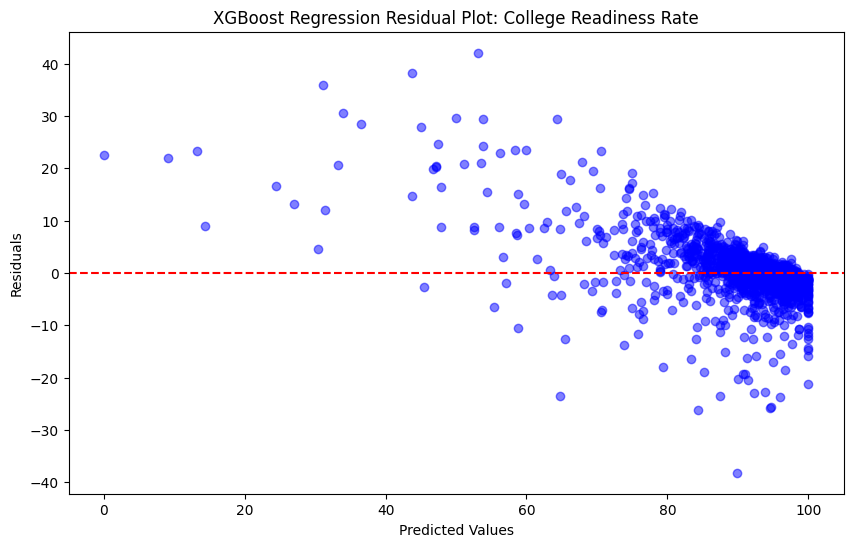

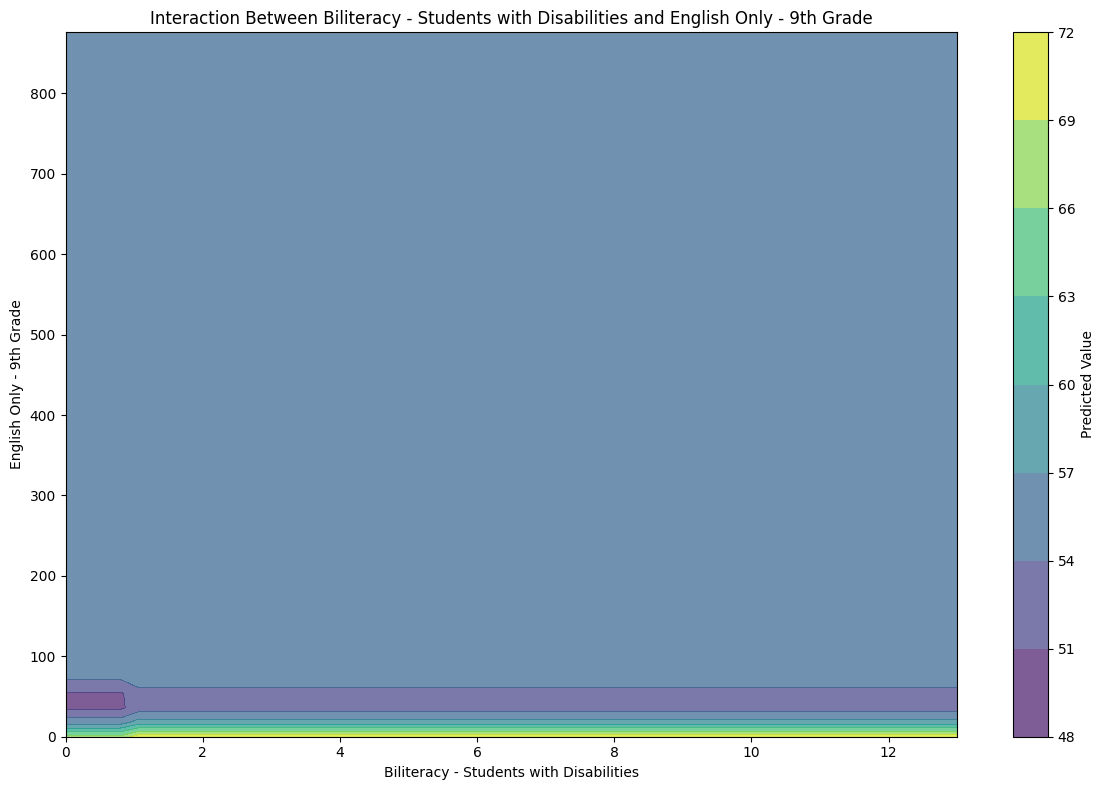

In [6]:
from modeling.utils.plotting import (
    plot_top_features_xgb,
    plot_predicted_vs_actual_xgb,
    plot_residuals_xgb,
    plot_feature_interaction
)

plot_top_features_xgb(xgb_graduation_result, target_variable="College Readiness Rate")
plot_predicted_vs_actual_xgb(
    xgb_graduation_result["y_pred"],
    xgb_graduation_result["y_test"],
    target_column="College Readiness Rate",
)
plot_residuals_xgb(
    xgb_graduation_result["y_pred"],
    xgb_graduation_result["y_test"],
    target_column="College Readiness Rate",
)

top_features = xgb_graduation_result['model'].feature_importances_.argsort()[-2:][::-1]
feature_names = xgb_graduation_result['feature_names']

plot_feature_interaction(
    xgb_graduation_result["model"],
    xgb_graduation_result["X"],
    feature1_idx=top_features[0],  
    feature2_idx=top_features[1], 
    feature_names=feature_names
)

### College Readiness


In [7]:
target_variable = "UniReqsPercent.TA"

xgb_college_result = cross_validate_xgboost(
    df=merged,
    target_column=target_variable,
    columns_to_drop=[target_variable] + columns_to_drop,
    print_results=True,
    n_jobs=-1,
)

Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2023-24:
RMSE: 13.1910 ± 0.4106
MAE: 9.1698 ± 0.2138
R^2: 0.6566 ± 0.0238


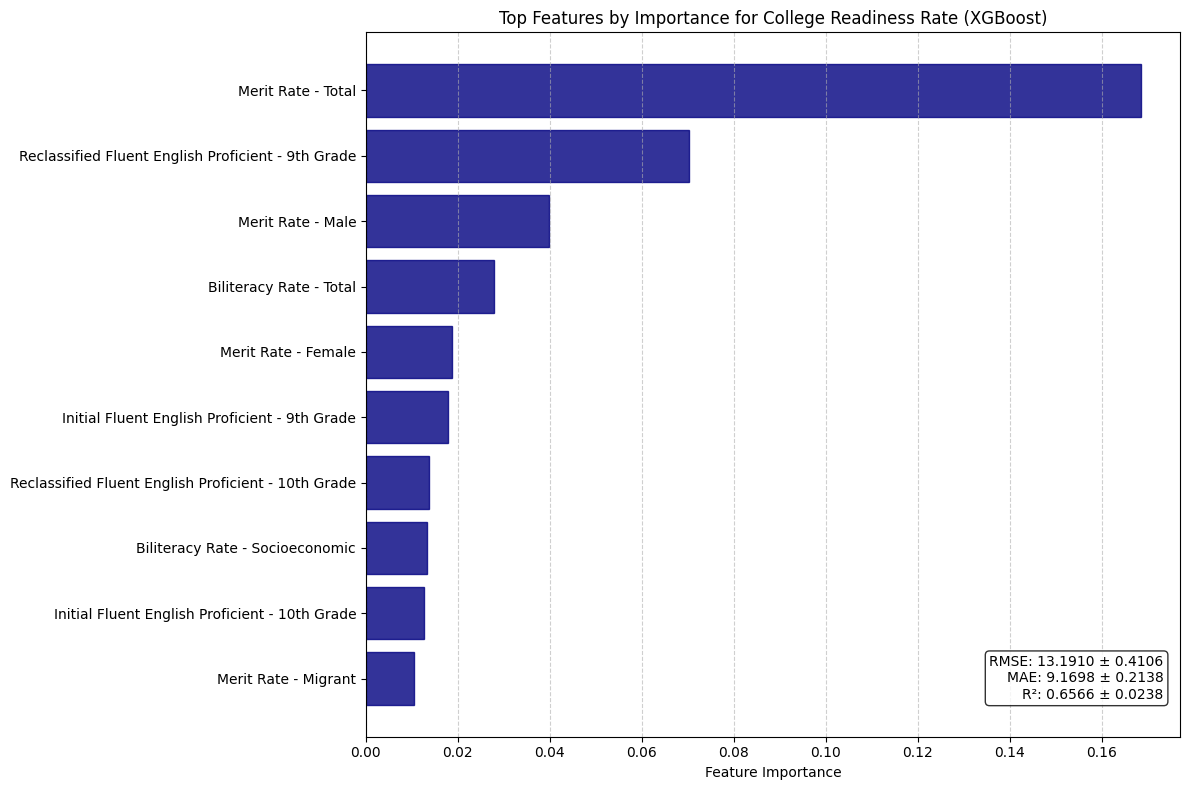

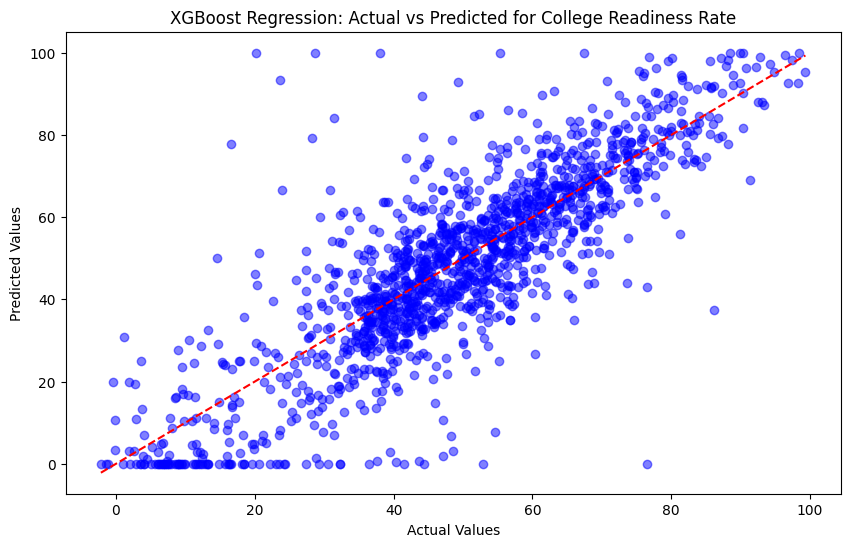

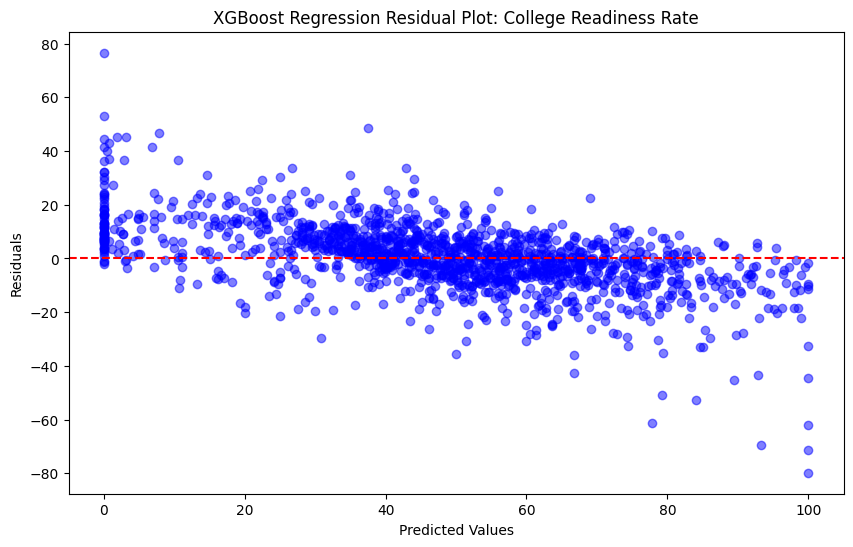

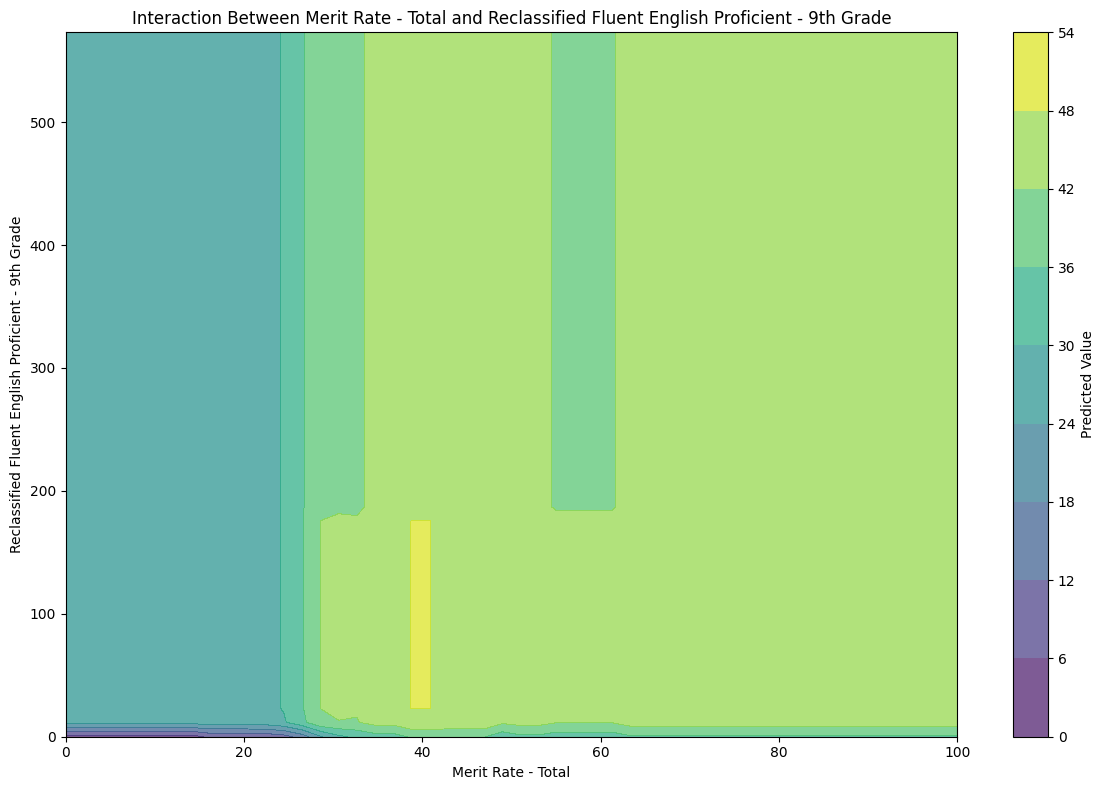

In [8]:
from modeling.utils.plotting import (
    plot_top_features_xgb,
    plot_predicted_vs_actual_xgb,
    plot_residuals_xgb,
)

plot_top_features_xgb(xgb_college_result, target_variable="College Readiness Rate")
plot_predicted_vs_actual_xgb(
    xgb_college_result["y_pred"],
    xgb_college_result["y_test"],
    target_column="College Readiness Rate",
)
plot_residuals_xgb(
    xgb_college_result["y_pred"],
    xgb_college_result["y_test"],
    target_column="College Readiness Rate",
)

top_features = xgb_college_result['model'].feature_importances_.argsort()[-2:][::-1]
feature_names = xgb_college_result['feature_names']

plot_feature_interaction(
    xgb_college_result["model"],
    xgb_college_result["X"],
    feature1_idx=top_features[0],  
    feature2_idx=top_features[1], 
    feature_names=feature_names
)

### Math Scores


In [9]:
target_variable = "currstatus.ALL_MATH"

xgb_math_result = cross_validate_xgboost(
    df=merged,
    target_column=target_variable,
    columns_to_drop=[target_variable] + columns_to_drop,
    print_results=True,
    n_jobs=-1,
)

Cross-Validation Results for currstatus.ALL_MATH (5 folds) for 2023-24:
RMSE: 34.8927 ± 0.7948
MAE: 25.0431 ± 0.4544
R^2: 0.7348 ± 0.0071


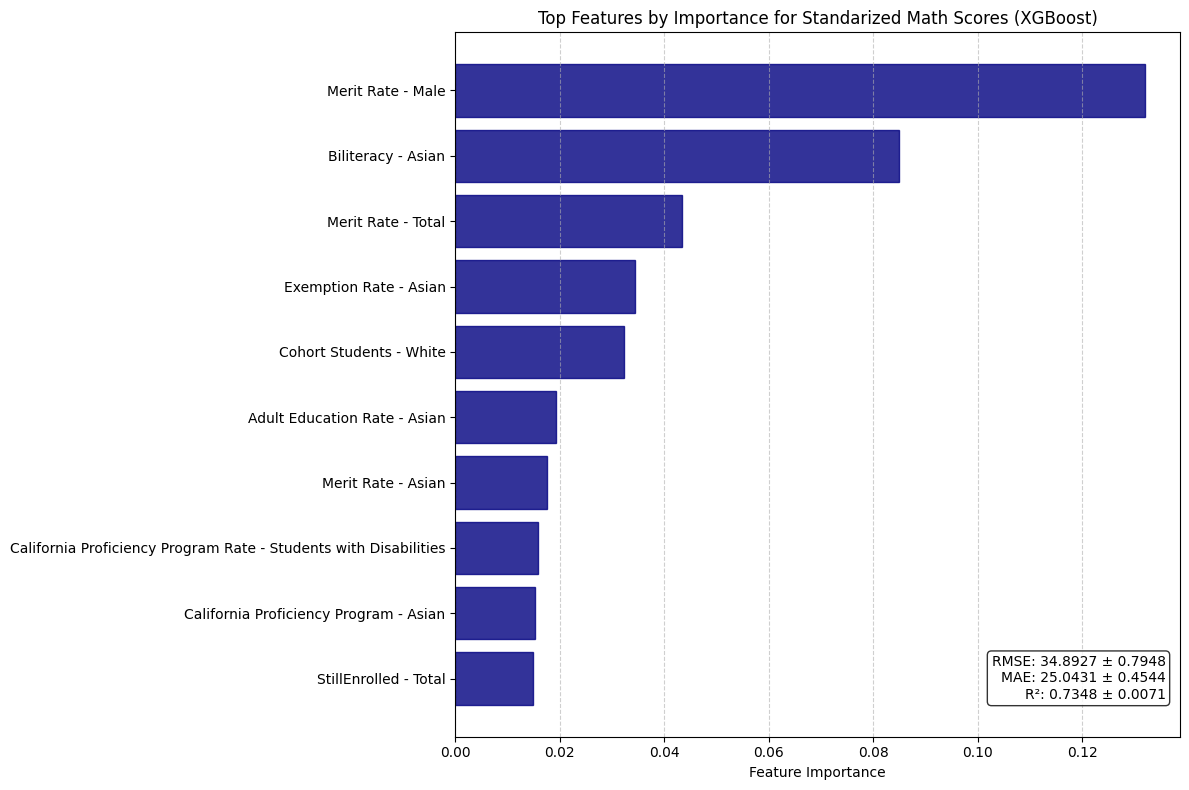

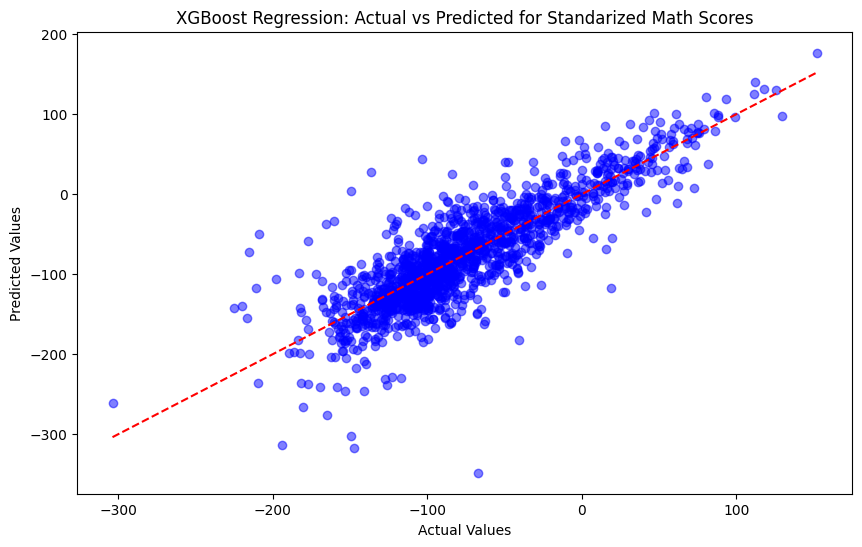

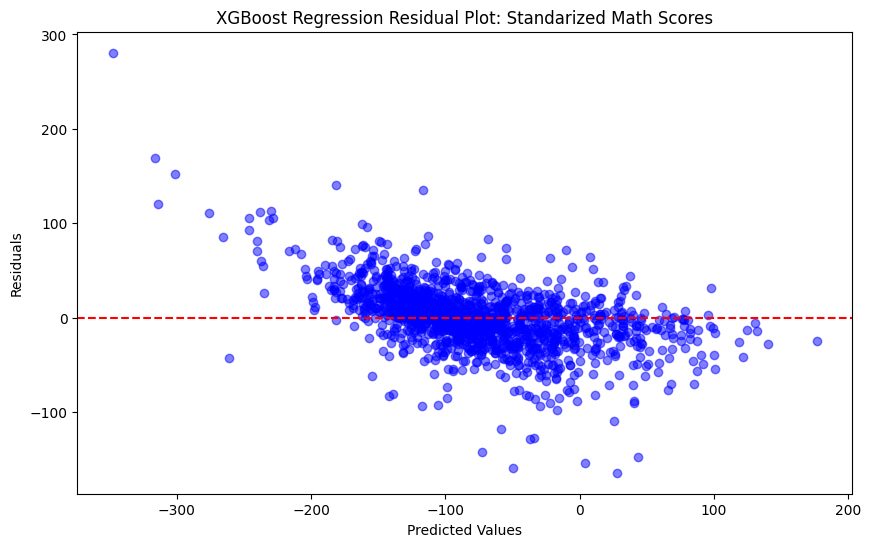

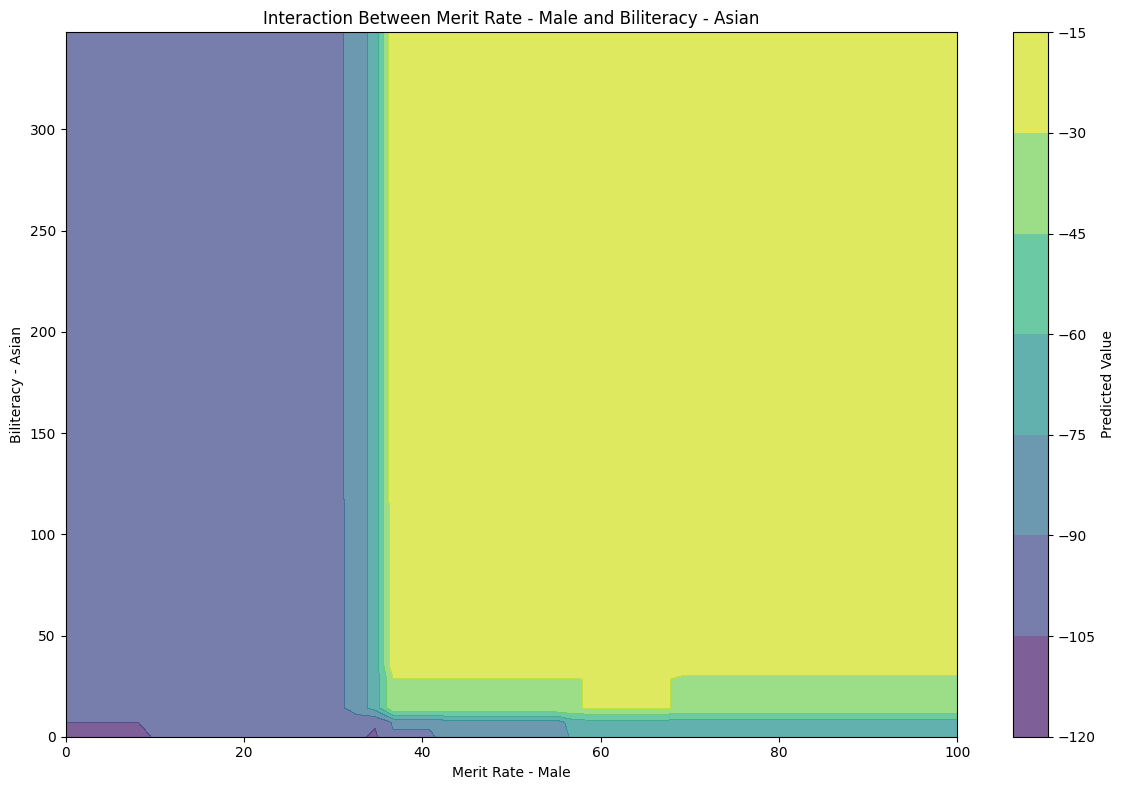

In [10]:
from modeling.utils.plotting import (
    plot_top_features_xgb,
    plot_predicted_vs_actual_xgb,
    plot_residuals_xgb,
    plot_feature_interaction
)

plot_top_features_xgb(xgb_math_result, target_variable="Standarized Math Scores")
plot_predicted_vs_actual_xgb(
    xgb_math_result["y_pred"],
    xgb_math_result["y_test"],
    target_column="Standarized Math Scores",
)
plot_residuals_xgb(
    xgb_math_result["y_pred"],
    xgb_math_result["y_test"],
    target_column="Standarized Math Scores",
)
top_features = xgb_math_result['model'].feature_importances_.argsort()[-2:][::-1]
feature_names = xgb_math_result['feature_names']

plot_feature_interaction(
    xgb_math_result["model"],
    xgb_math_result["X"],
    feature1_idx=top_features[0],  
    feature2_idx=top_features[1],  
    feature_names=feature_names
)

### ELA Scores


In [11]:
target_variable = "currstatus.ALL_ELA"

xgb_ela_result = cross_validate_xgboost(
    df=merged,
    target_column=target_variable,
    columns_to_drop=[target_variable] + columns_to_drop,
    print_results=True,
    n_jobs=-1,
)

Cross-Validation Results for currstatus.ALL_ELA (5 folds) for 2023-24:
RMSE: 38.6241 ± 1.2891
MAE: 26.6444 ± 0.3535
R^2: 0.6133 ± 0.0303


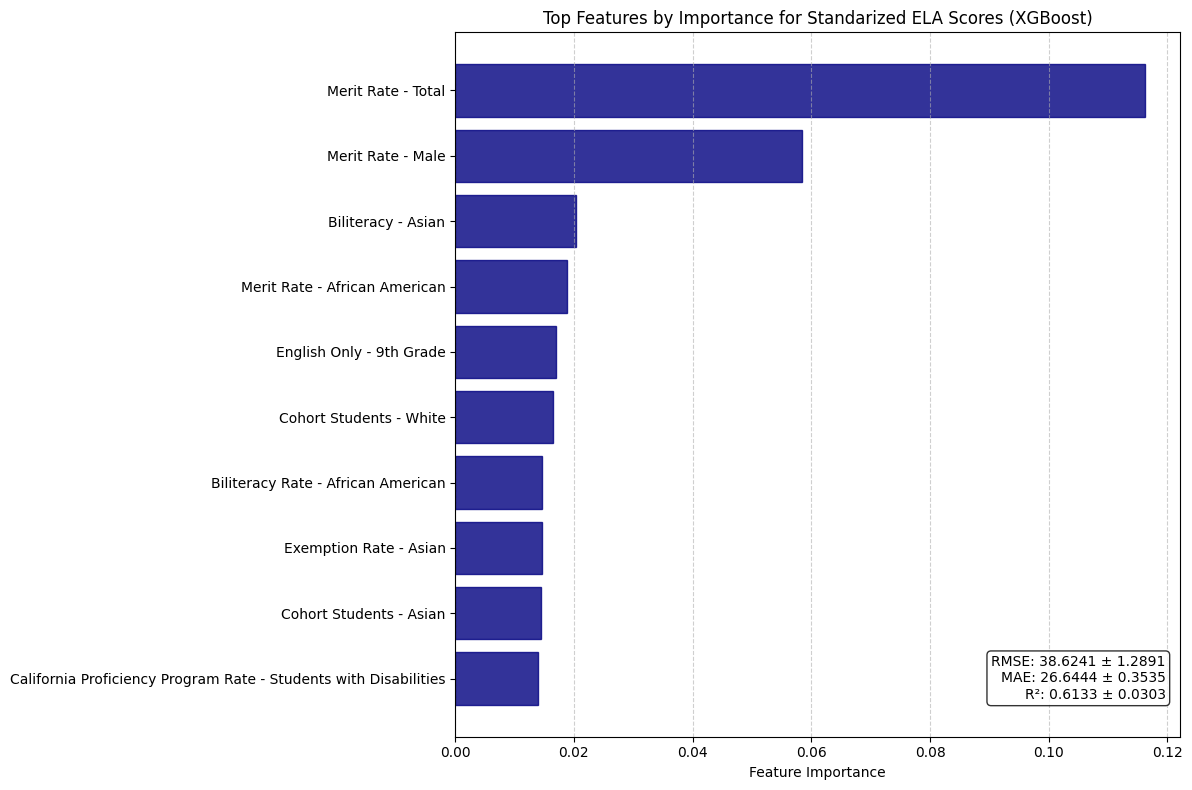

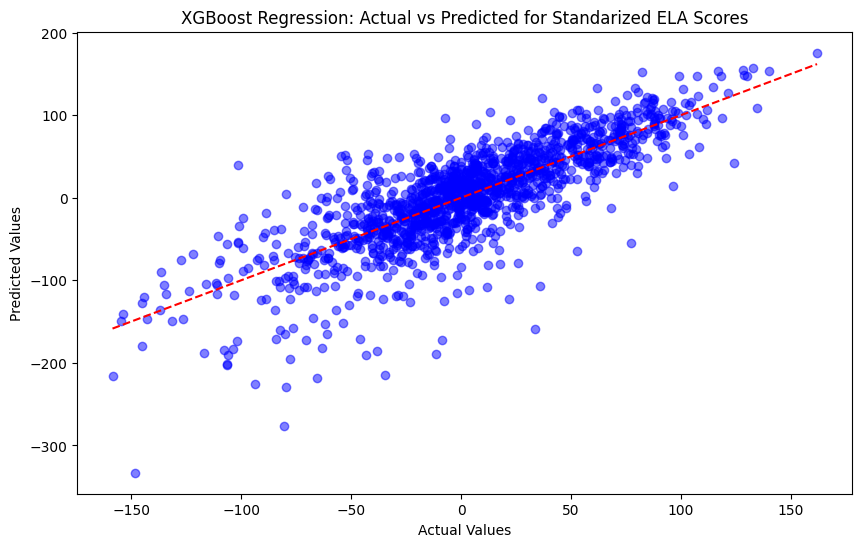

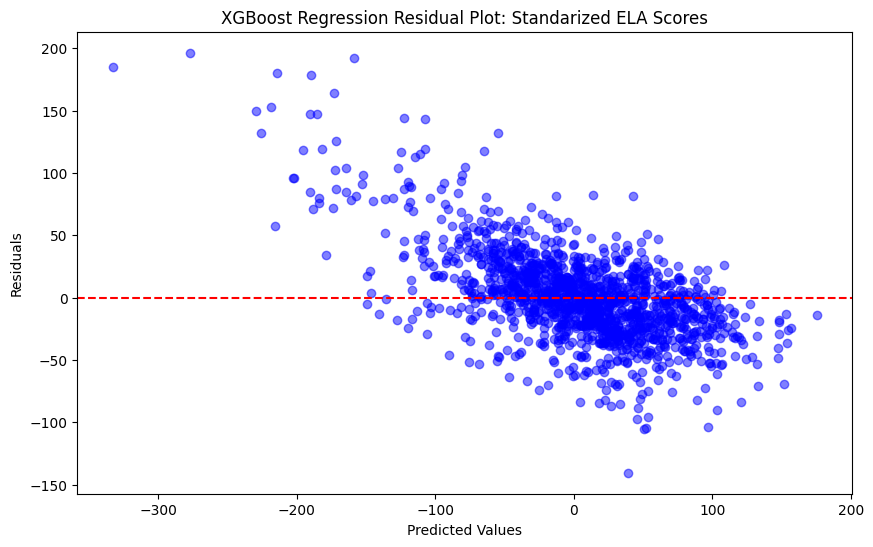

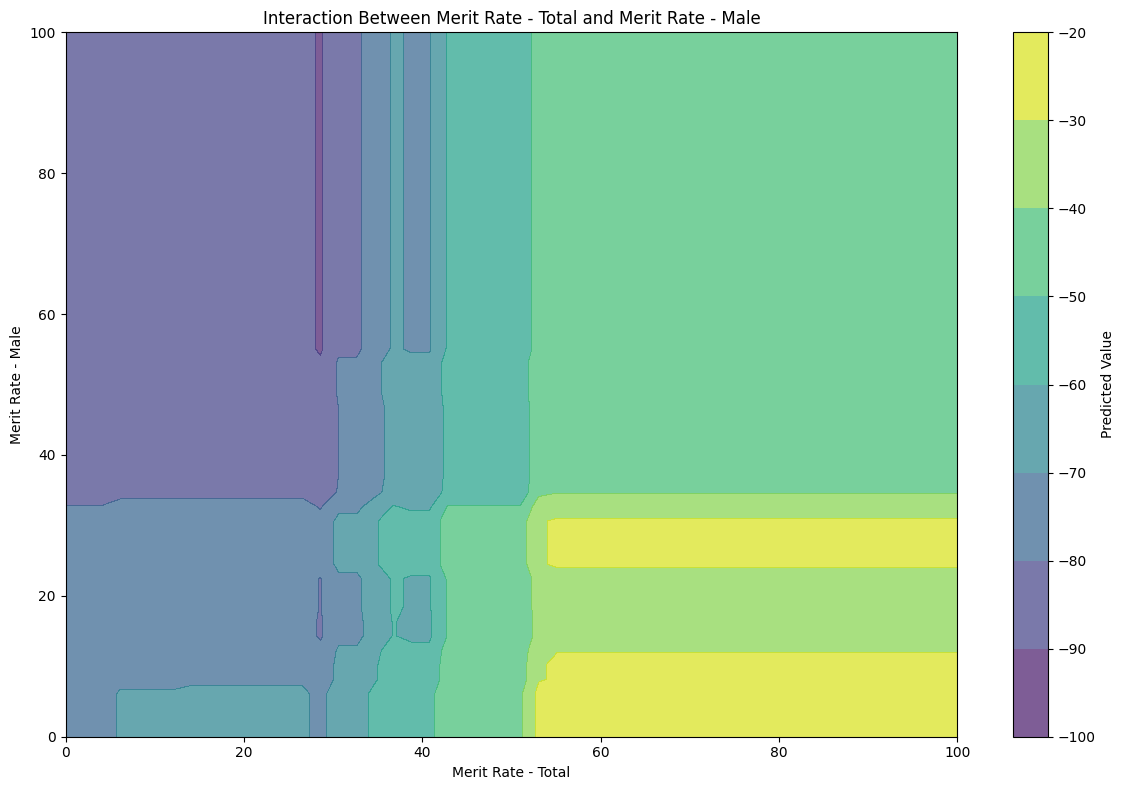

In [12]:
from modeling.utils.plotting import (
    plot_top_features_xgb,
    plot_predicted_vs_actual_xgb,
    plot_residuals_xgb,
)

plot_top_features_xgb(xgb_ela_result, target_variable="Standarized ELA Scores")
plot_predicted_vs_actual_xgb(
    xgb_ela_result["y_pred"],
    xgb_ela_result["y_test"],
    target_column="Standarized ELA Scores",
)
plot_residuals_xgb(
    xgb_ela_result["y_pred"],
    xgb_ela_result["y_test"],
    target_column="Standarized ELA Scores",
)
top_features = xgb_ela_result['model'].feature_importances_.argsort()[-2:][::-1]
feature_names = xgb_ela_result['feature_names']

plot_feature_interaction(
    xgb_ela_result["model"],
    xgb_ela_result["X"],
    feature1_idx=top_features[0],  
    feature2_idx=top_features[1],  
    feature_names=feature_names
)

## Random Forest


### Graduation Rate


In [13]:
from modeling.utils.randomforest import cross_validate_random_forest

target_variable = "RegHSDiplomaRate.TA"

rf_graduation_result = cross_validate_random_forest(
    df=merged,
    target_column=target_variable,
    columns_to_drop=[target_variable] + columns_to_drop,
    print_results=True,
    n_jobs=-1,
)

Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2023-24:
RMSE: 6.8044 ± 0.3946
MAE: 3.9490 ± 0.0985
R²: 0.5898 ± 0.0495


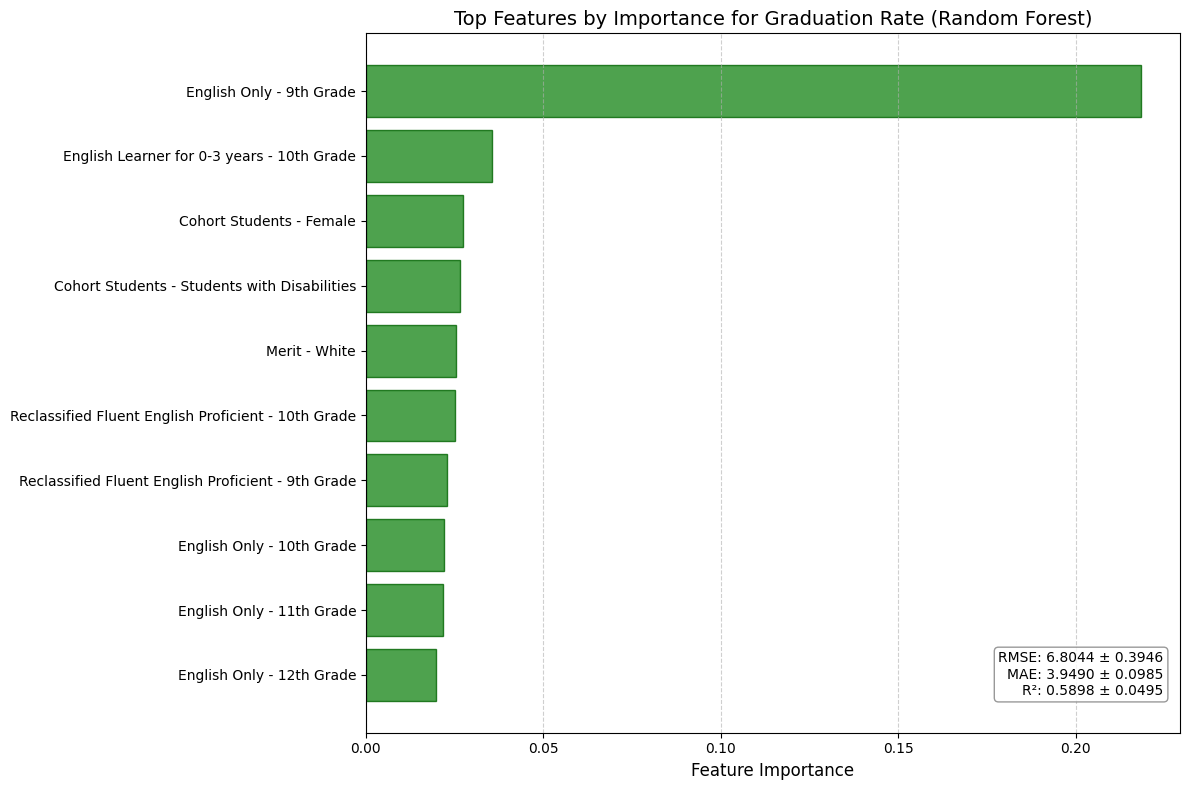

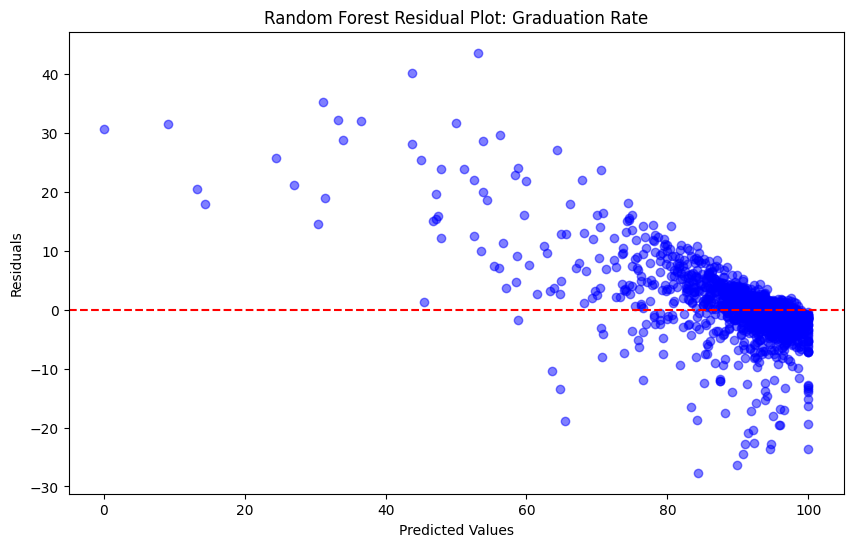

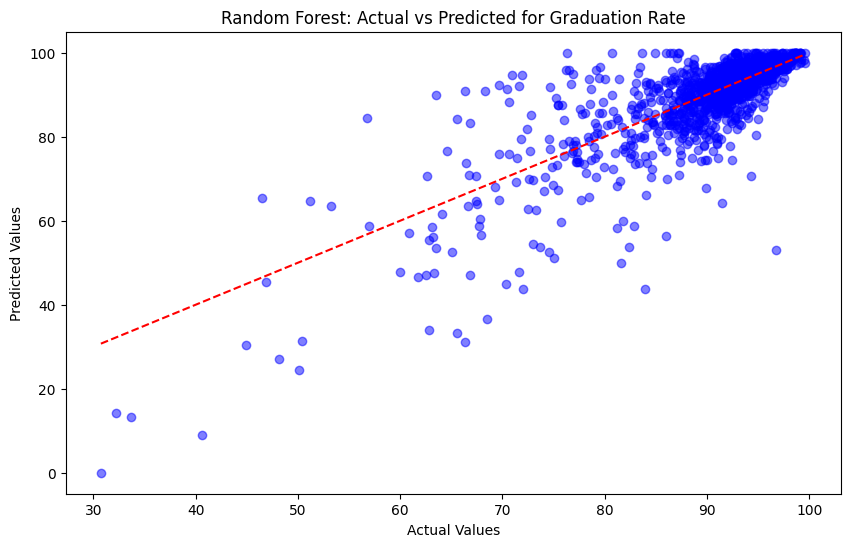

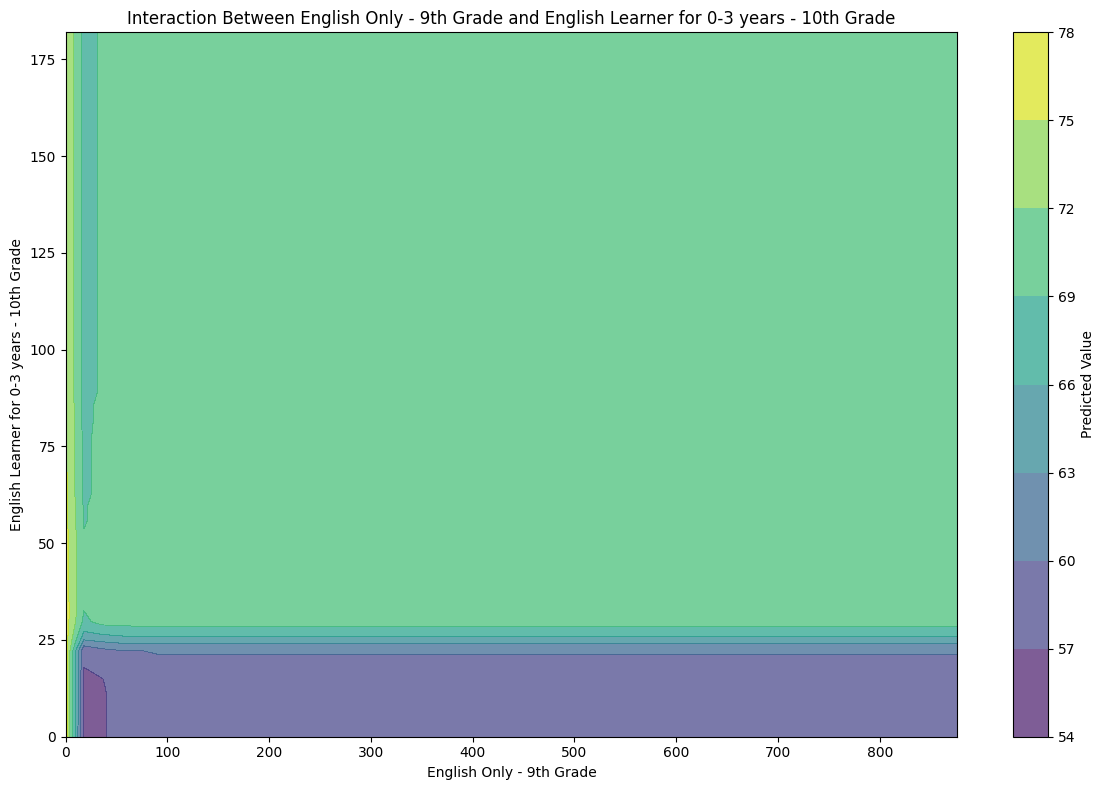

In [14]:
from modeling.utils.plotting import (
    plot_top_features_rf,
    plot_residuals_rf,
    plot_actual_predicted_rf,
    plot_feature_interaction
)


plot_top_features_rf(rf_graduation_result, target_variable="Graduation Rate")
plot_residuals_rf(
    rf_graduation_result["y_pred"],
    rf_graduation_result["y_test"],
    target_column="Graduation Rate",
)
plot_actual_predicted_rf(
    rf_graduation_result["y_pred"],
    rf_graduation_result["y_test"],
    target_column="Graduation Rate",
)
top_features = rf_graduation_result['model'].feature_importances_.argsort()[-2:][::-1]
feature_names = rf_graduation_result['feature_names']

plot_feature_interaction(
    rf_graduation_result["model"],
    rf_graduation_result["X"],
    feature1_idx=top_features[0], 
    feature2_idx=top_features[1],
    feature_names=feature_names
)

### College Readiness Rate

In [15]:
target_variable = "UniReqsPercent.TA"

rf_college_result = cross_validate_random_forest(
    df=merged,
    target_column=target_variable,
    columns_to_drop=[target_variable] + columns_to_drop,
    print_results=True,
    n_jobs=-1,
)

Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2023-24:
RMSE: 13.1281 ± 0.3840
MAE: 9.2122 ± 0.1836
R²: 0.6560 ± 0.0248


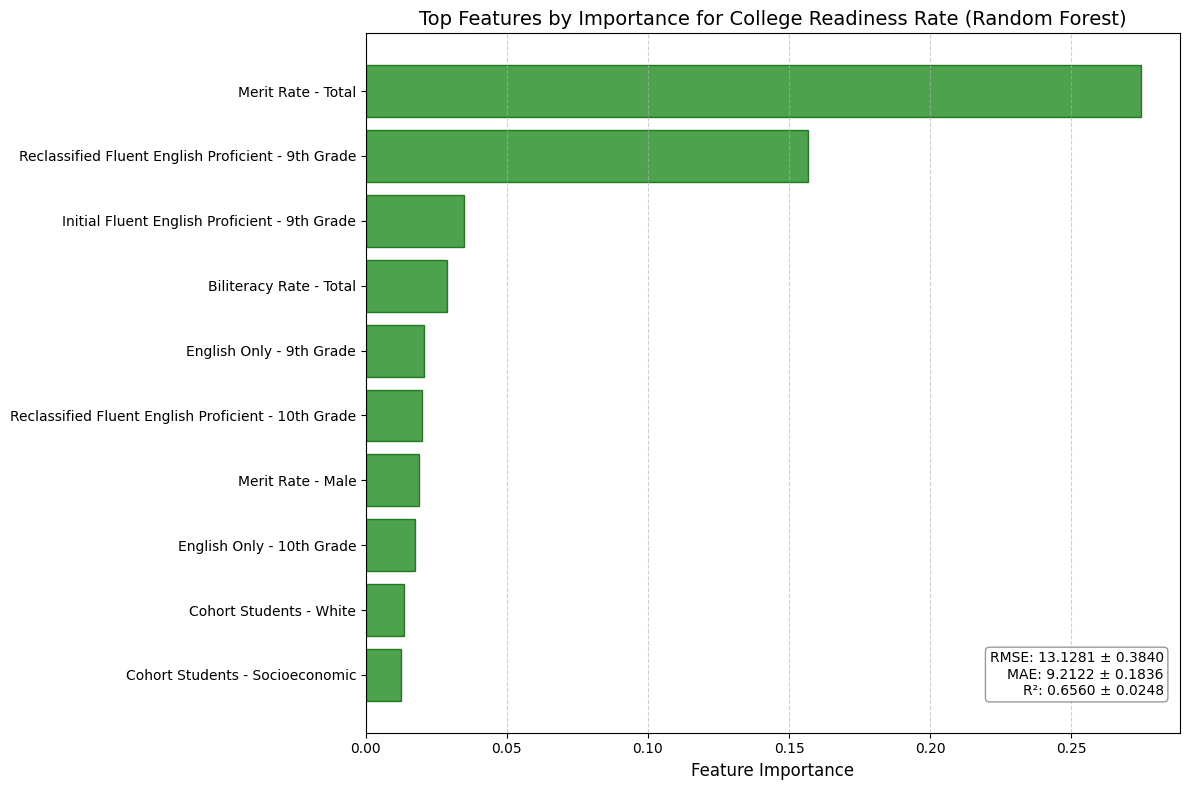

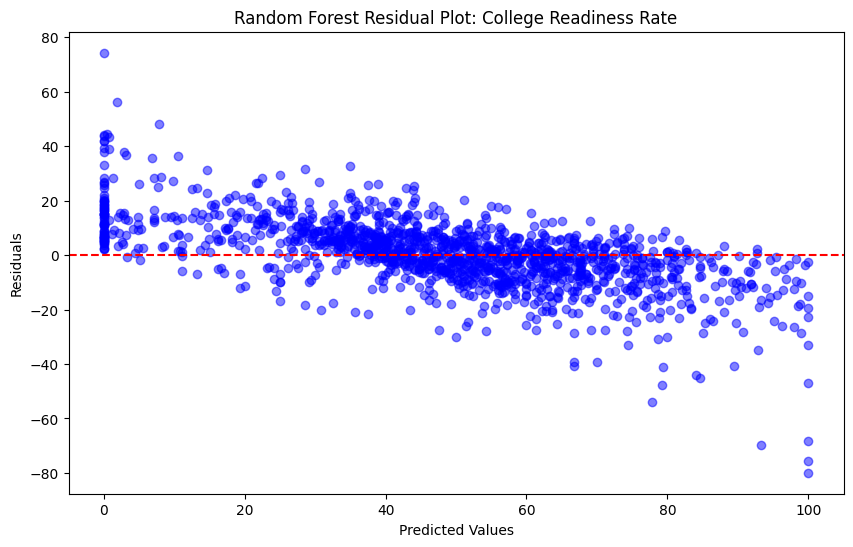

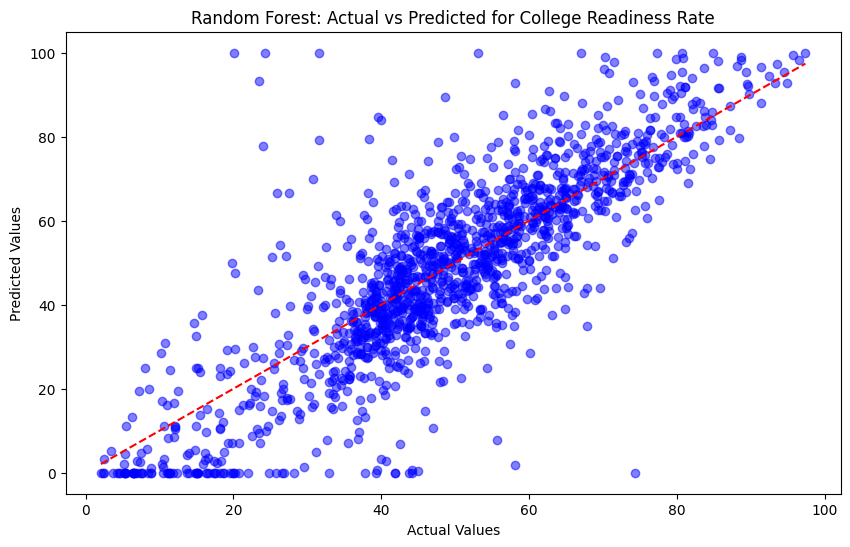

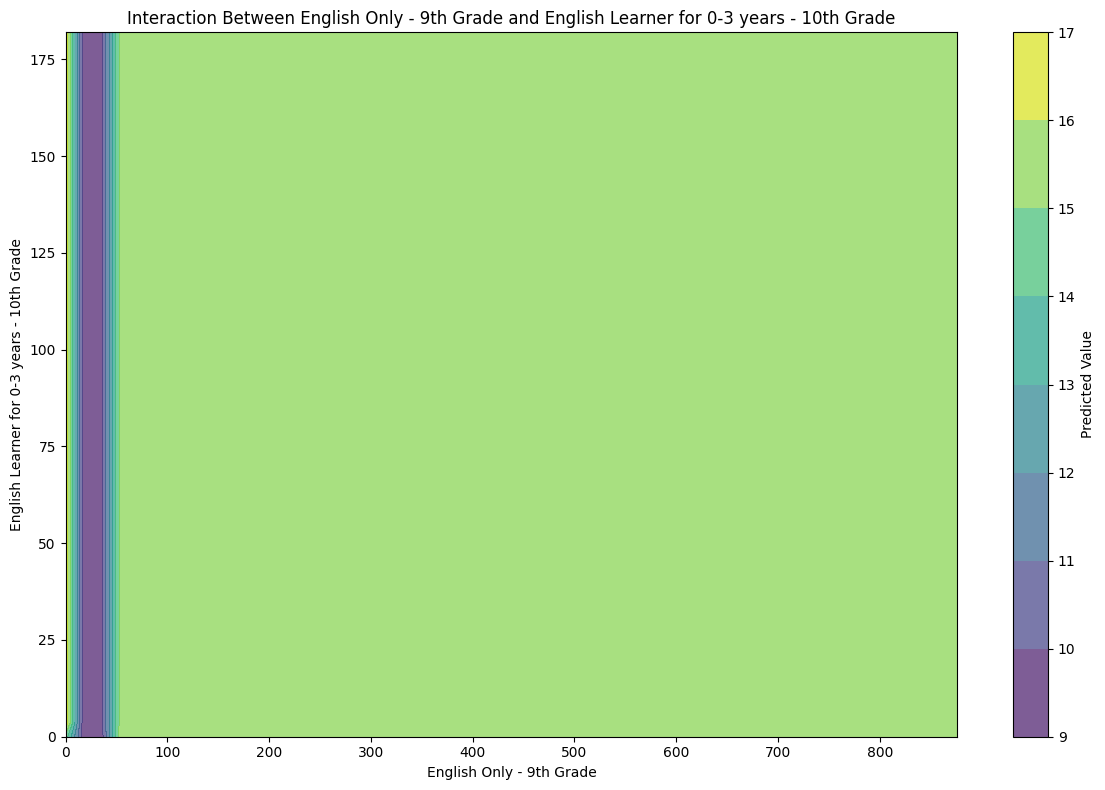

In [16]:
plot_top_features_rf(rf_college_result, target_variable="College Readiness Rate")
plot_residuals_rf(
    rf_college_result["y_pred"],
    rf_college_result["y_test"],
    target_column="College Readiness Rate",
)
plot_actual_predicted_rf(
    rf_college_result["y_pred"],
    rf_college_result["y_test"],
    target_column="College Readiness Rate",
)
plot_feature_interaction(
    rf_college_result["model"],
    rf_college_result["X"],
    feature1_idx=top_features[0], 
    feature2_idx=top_features[1],
    feature_names=feature_names
)

### Math Scores

In [17]:
target_variable = "currstatus.ALL_MATH"

rf_math_result = cross_validate_random_forest(
    df=merged,
    target_column=target_variable,
    columns_to_drop=[target_variable] + columns_to_drop,
    print_results=True,
    n_jobs=-1,
)

Cross-Validation Results for currstatus.ALL_MATH (5 folds) for 2023-24:
RMSE: 35.8766 ± 0.9573
MAE: 25.6166 ± 0.3229
R²: 0.7191 ± 0.0082


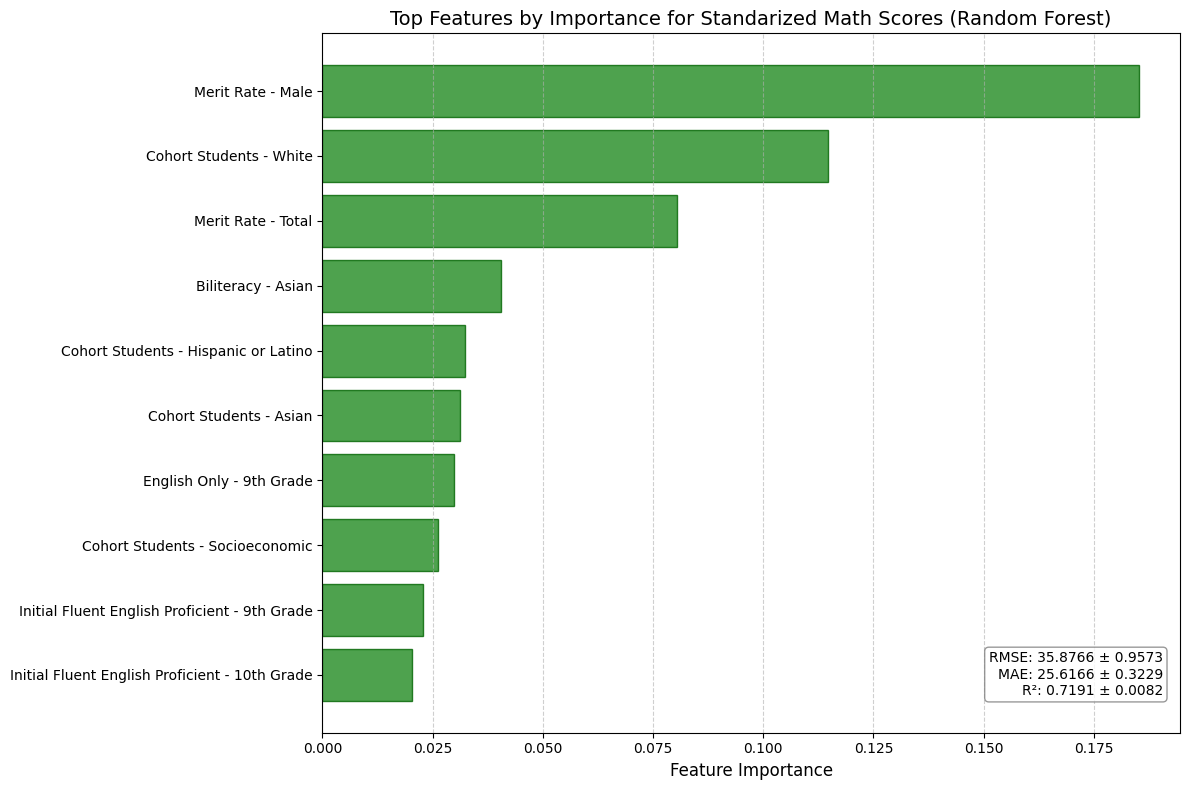

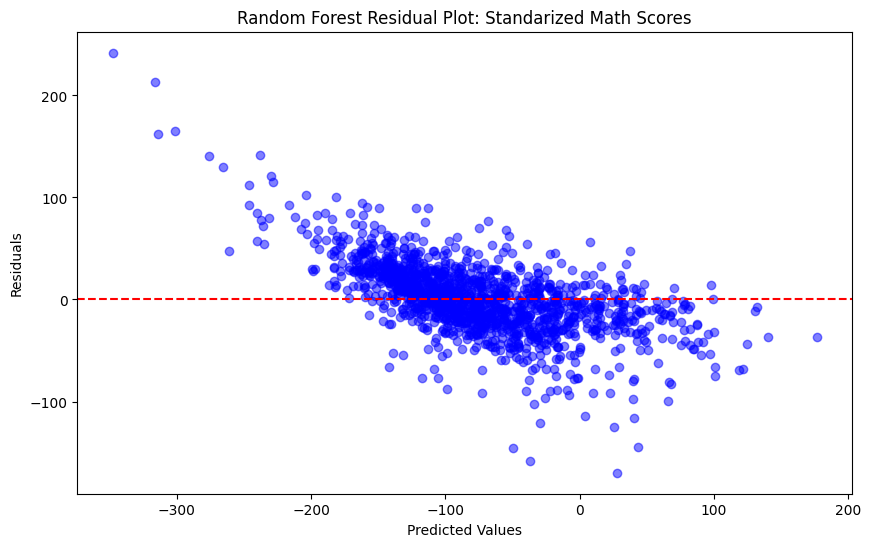

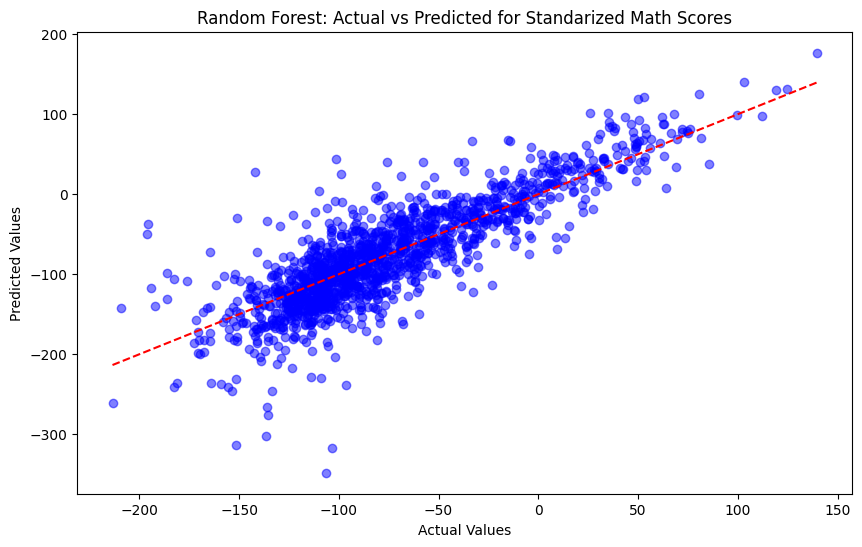

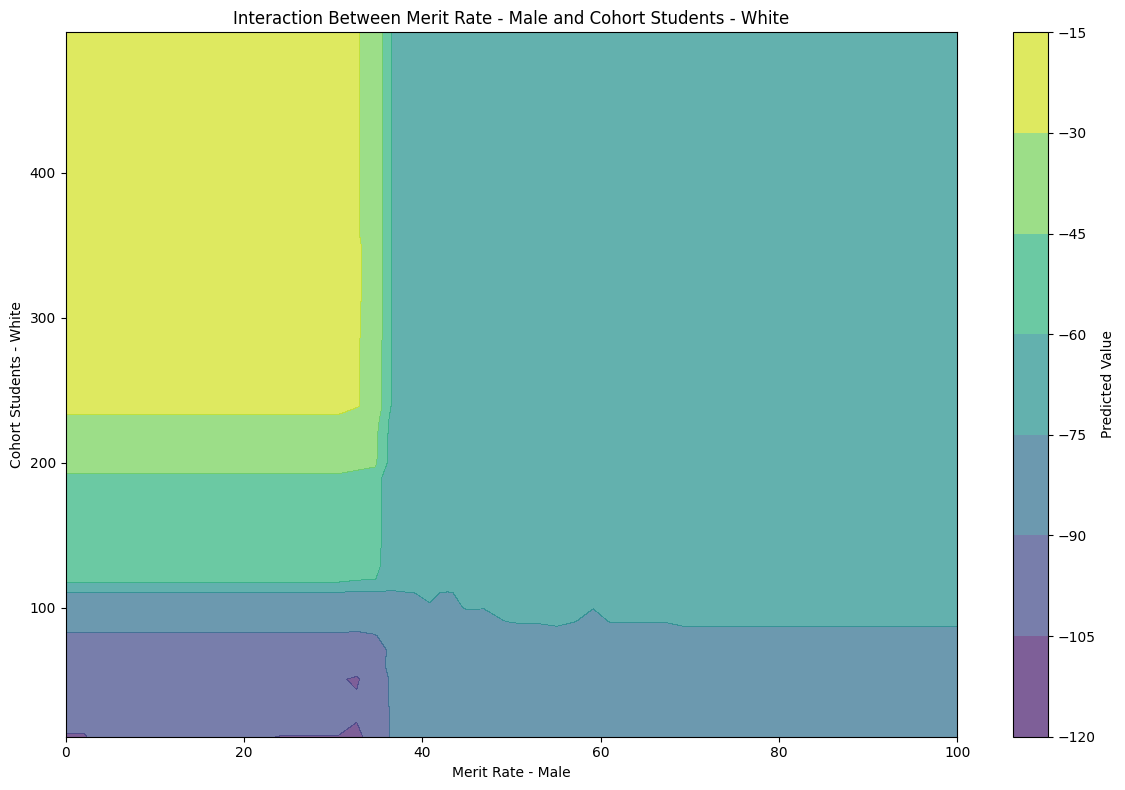

In [18]:
plot_top_features_rf(rf_math_result, target_variable="Standarized Math Scores")
plot_residuals_rf(
    rf_math_result["y_pred"],
    rf_math_result["y_test"],
    target_column="Standarized Math Scores",
)
plot_actual_predicted_rf(
    rf_math_result["y_pred"],
    rf_math_result["y_test"],
    target_column="Standarized Math Scores",
)
top_features = rf_math_result['model'].feature_importances_.argsort()[-2:][::-1]
feature_names = rf_math_result['feature_names']

plot_feature_interaction(
    rf_math_result["model"],
    rf_math_result["X"],
    feature1_idx=top_features[0], 
    feature2_idx=top_features[1],  
    feature_names=feature_names
)

### ELA Scores

In [19]:
target_variable = "currstatus.ALL_ELA"

rf_ela_result = cross_validate_random_forest(
    df=merged,
    target_column=target_variable,
    columns_to_drop=[target_variable] + columns_to_drop,
    print_results=True,
    n_jobs=-1,
)

Cross-Validation Results for currstatus.ALL_ELA (5 folds) for 2023-24:
RMSE: 39.2326 ± 1.1221
MAE: 27.1509 ± 0.2612
R²: 0.5958 ± 0.0245


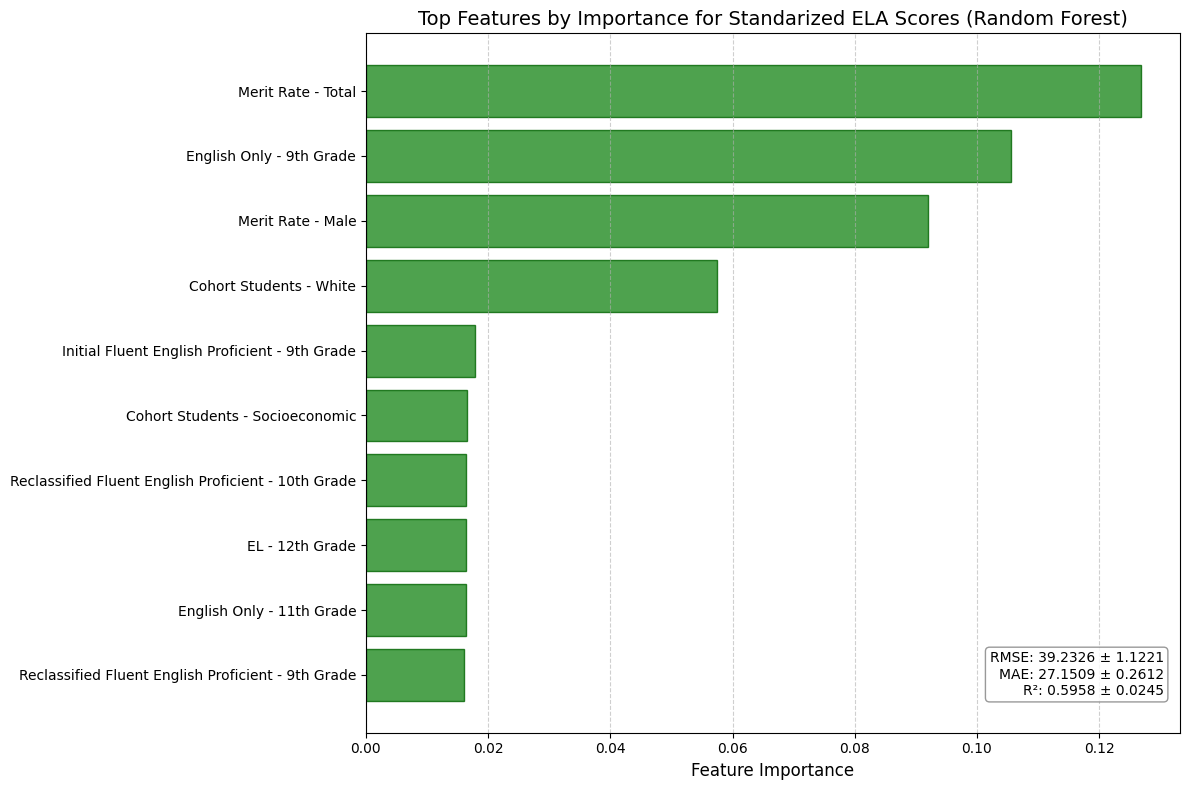

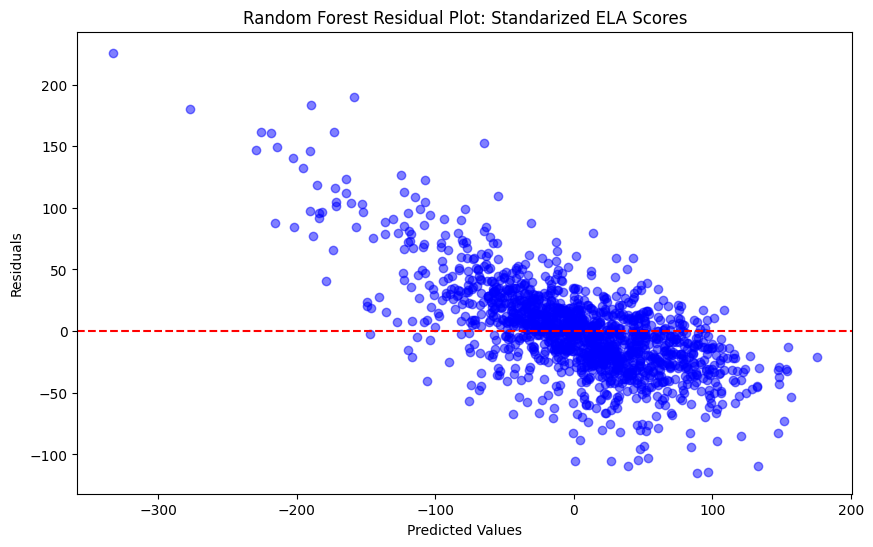

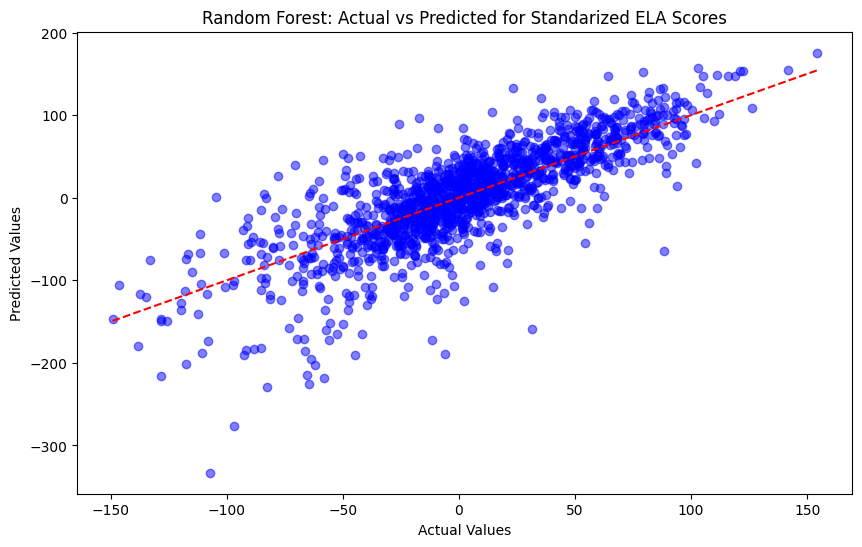

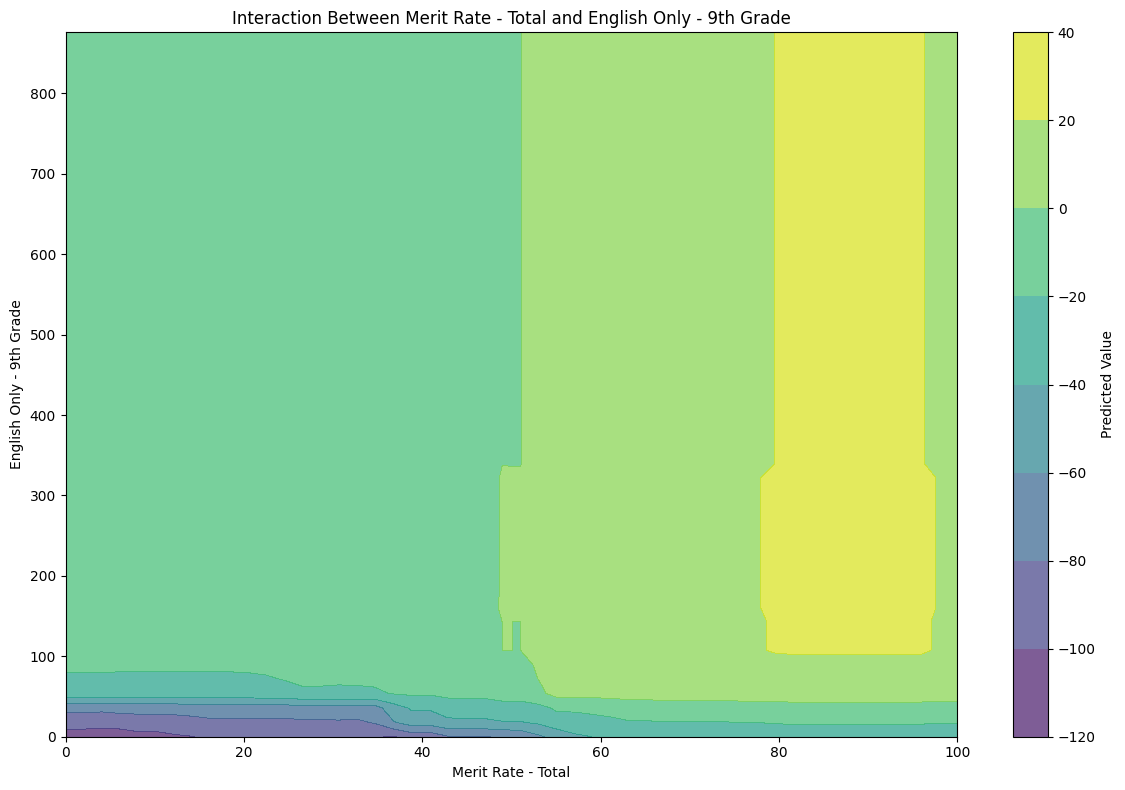

In [20]:
plot_top_features_rf(rf_ela_result, target_variable="Standarized ELA Scores")
plot_residuals_rf(
    rf_ela_result["y_pred"],
    rf_ela_result["y_test"],
    target_column="Standarized ELA Scores",
)
plot_actual_predicted_rf(
    rf_ela_result["y_pred"],
    rf_ela_result["y_test"],
    target_column="Standarized ELA Scores",
)
top_features = rf_ela_result['model'].feature_importances_.argsort()[-2:][::-1]
feature_names = rf_ela_result['feature_names']

plot_feature_interaction(
    rf_ela_result["model"],
    rf_ela_result["X"],
    feature1_idx=top_features[0],  
    feature2_idx=top_features[1], 
    feature_names=feature_names
)